<h1><center>Assignment 1</center></h1>
<h1><center>Class: AML 1104_2</center></h1>
<h1><center>Data Science and Machine Learning in Canada</center></h1><br><br><br><br><br><br><br><br><br>
<h1><center>Instructor: Mohammad Islam</center></h1>
<h1><center>Submitted By</center></h1>
<h1><center>Camilo Espitia (C0785089)</center>
<h1><center>Deval Arora (C0787539)</center>
<h1><center>Jonatas Aguiar (C0790419)</center>
<h1><center>Saurabh Deswal (C0787134)</center><br><br><br><br><br><br>
<h1><center>Lambton College In Toronto</center></h1>
<h1><center>17 December 2020</center></h1>

### Aim: Conduct an exploratory data analysis of UCI Machine Learning data set. Use supervised and unsupervised methods. 

* **Data preprocessing:**
    1. Load the data set into a data frame
    2. Are there any missing values in the dataset? How to handle that.
    3. Use feature selection and pruning techniques.

* **Data visualization:**
    1. Use Data visualization techniques to plot in graphs.
    2. Use a measure of central tendency for each feature.
    3. Show the dispersion (standard deviation and IQR) of features.

* **Supervised learning:**
    1. Explore random split of data as test and training set using Python.
    2. Use the training data set to train the classification model.
    3. Observe the performance of the model with test data set.
    4. Create a confusion matrix to present the result.

* **Unsupervised learning:**
    1. Use K-means algorithm to find out cluster from the data set.
    2. Try different number of clusters to compare the results.

## Data Loading & Inspection

**Context**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

---



**Content**

Attribute Information:

1. age
2. sex (0 - female, 1 - male)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target variable (0 - 4, we will be treating as severity of heart disease)

### Part 1: Data Preprocessing

In [1]:
#import required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sns.set()   # Set the style for graphs
warnings.filterwarnings('ignore')   # Ignore all warnings

%matplotlib inline

In [2]:
#Loading the dataset using pandas
# df = pd.read_csv('cleveland_copy.csv', header=None)
df = pd.read_csv('cleveland_copy.csv')

In [3]:
#Adding Column names to our pandas dataframe
df.columns = ['age', 'sex', 'chestpain', 'restbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal', 'target']

In [4]:
#Returns top 5 rows of our dataset
df.head()

,age,sex,chestpain,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
#provides the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   sex        302 non-null    int64  
 2   chestpain  302 non-null    int64  
 3   restbps    302 non-null    int64  
 4   chol       302 non-null    int64  
 5   fbs        302 non-null    int64  
 6   restecg    302 non-null    int64  
 7   thalach    302 non-null    int64  
 8   exang      302 non-null    int64  
 9   oldpeak    302 non-null    float64
 10  slope      302 non-null    int64  
 11  ca         298 non-null    float64
 12  thal       300 non-null    float64
 13  target     302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [6]:
df.ca.unique()

array([ 3.,  2.,  0.,  1., nan])

In [7]:
#provides deatils description of our dataset
df.describe().T   # 'T' is for transpose

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.410596,9.040163,29.0,48.00,55.5,61.0,77.0
sex,302.0,0.678808,0.467709,0.0,0.00,1.0,1.0,1.0
chestpain,302.0,3.165563,0.953612,1.0,3.00,3.0,4.0,4.0
restbps,302.0,131.645695,17.612202,94.0,120.00,130.0,140.0,200.0
chol,302.0,246.738411,51.856829,126.0,211.00,241.5,275.0,564.0
fbs,302.0,0.145695,0.353386,0.0,0.00,0.0,0.0,1.0
restecg,302.0,0.986755,0.994916,0.0,0.00,0.5,2.0,2.0
thalach,302.0,149.605960,22.912959,71.0,133.25,153.0,166.0,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.0,1.0
oldpeak,302.0,1.035430,1.160723,0.0,0.00,0.8,1.6,6.2


# Data Cleaning
#### Now we will start with cleaning our dataset

In [8]:
#Checks if there are any null values present in any column of the dataframe
#column ca and thal have null values
df.isnull().sum()

age          0
sex          0
chestpain    0
restbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
target       0
dtype: int64

In [9]:
#Create a function to create new columns ca_median and ca_random
#ca_median will contain NaN values replaced by the median of ca
#ca_random will contain NaN values replaced by a random value of ca selected  from the ca column
#The above two techniques are called Median replacement and Random Sample Imputation respectively

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    #find the random value of ca column, keep the random_state fixed so the value remains same in each iteration
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=42)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

#Calculate the median of ca
median=df.ca.median()
impute_nan(df,"ca",median)

In [10]:
#Take a look at Standart deviation of ca, ca_median and ca_random. 
#The Standart deviation of ca and ca_random are closest, so we will choose ca_random instead of ca_median

print(df['ca'].std())
print(df['ca_random'].std())
print(df['ca_median'].std())

0.9382019024458484
0.9345480852527853
0.9351423476211553


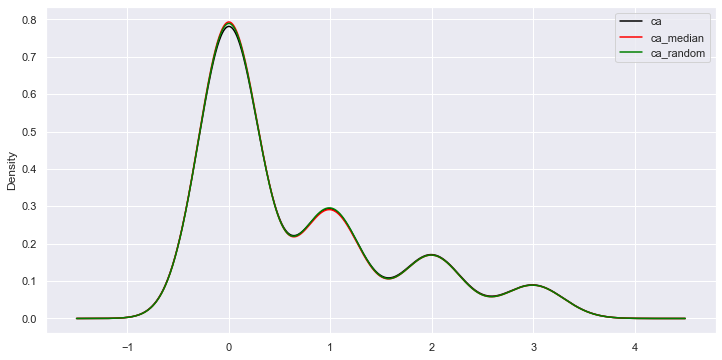

In [11]:
#Plot the KDE curve for ca, ca_random and ca_median
#The curve for ca and ca_random are closest, so we can say ca_random has filled the missing values perfectly

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(12, 6)
df.ca.plot(kind='kde', ax=ax,color='black')
df.ca_median.plot(kind='kde', ax=ax, color='red')
df.ca_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
df.isnull().sum()

age          0
sex          0
chestpain    0
restbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
target       0
ca_median    0
ca_random    0
dtype: int64

In [13]:
#As thal have only two missing values, we can drop it
df = df[df['thal'].notna()]

In [14]:
df.isnull().sum()

age          0
sex          0
chestpain    0
restbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         0
target       0
ca_median    0
ca_random    0
dtype: int64

In [15]:
df.ca_median.unique()

array([3., 2., 0., 1.])

In [16]:
#dropping the ca and ca_median column as we have created a new feature ca_random
df.drop(['ca_median'], axis=1,inplace=True)
df.drop(['ca'], axis=1,inplace=True)

In [17]:
df.ca_random.unique()

array([3., 2., 0., 1.])

In [18]:
df.head()

,age,sex,chestpain,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target,ca_random
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,2,3.0
1,67,1,4,120,229,0,2,129,1,2.6,2,7.0,1,2.0
2,37,1,3,130,250,0,0,187,0,3.5,3,3.0,0,0.0
3,41,0,2,130,204,0,2,172,0,1.4,1,3.0,0,0.0
4,56,1,2,120,236,0,0,178,0,0.8,1,3.0,0,0.0


In [19]:
#Now we can see we donot have any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        300 non-null    int64  
 1   sex        300 non-null    int64  
 2   chestpain  300 non-null    int64  
 3   restbps    300 non-null    int64  
 4   chol       300 non-null    int64  
 5   fbs        300 non-null    int64  
 6   restecg    300 non-null    int64  
 7   thalach    300 non-null    int64  
 8   exang      300 non-null    int64  
 9   oldpeak    300 non-null    float64
 10  slope      300 non-null    int64  
 11  thal       300 non-null    float64
 12  target     300 non-null    int64  
 13  ca_random  300 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 35.2 KB


# Feature Selection
#### Before proceeding further, we will first find out the features that are important for our dataset
#### Here we will do feature selection using two simple methods
#### 1. Detecting Variance Threshold
#### 2. Using ExtraTreesClassifier


In [20]:
#Splitting the dataset into dependent and non-dependent feature before doing feature selection
#to avoid overfitting at later stage
#Remember, we will be using X just for our analysis, i.e. feature selection and outlier detection
X, y = df.drop(['target'], axis=1), df.target

In [21]:
#Feature Selection: Method 1
#In variance threshold method, we remove the features having 0 variance as they do not contribute anything to model
#Importing the VarianceThreshold library from sklearn and fitting it to our dataset
#We found that there are two features having low variance, therefore they add least value to our dataset
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(X)

var_thres.get_support()
X.columns[var_thres.get_support()]

#constant_columns will contain all the columns with 0 variance
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print((constant_columns))

['fbs']


ca_random    0.114163
thalach      0.112721
thal         0.099542
oldpeak      0.097607
age          0.097577
chol         0.094549
restbps      0.091957
chestpain    0.071405
exang        0.058033
slope        0.055348
restecg      0.043246
sex          0.037254
fbs          0.026598
dtype: float64


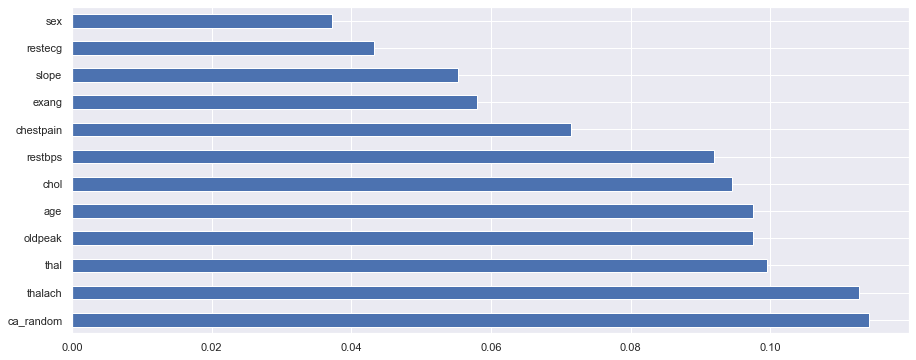

In [22]:
#Feature Selection: Method 2
#Now, we will use extratrees classisfier to find the feature importance
#We are plottinh a horizontal bar graph to visualize which features are important
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=0)
model.fit(X,y)

#We have sorted the values in descenting order
#since the value have rapidly decreased after exang, we will ignore features after exang
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.sort_values(axis=0,ascending=False))
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [23]:
#Selecting only the features, selected by ExtraTreesClassifier
X=X[['thalach','oldpeak','ca_random','thal','chol','age','restbps','chestpain']]

# Detecting Outliers
#### After selecting the important features, we need to search for outliers in our data
#### Here we will calculate z-score to detect the outliers

In [24]:
#Here, we are converting the values of the dataset of every column to a list
#This is done to pass the values to the function we are using to calculate the z-score

thalach_values=list(X['thalach'])
oldpeak_values=list(X['oldpeak'])
ca_random_values=list(X['ca_random'])
chol_values=list(X['chol'])
age_values=list(X['age'])
restbps_values=list(X['restbps'])
chestpain_values=list(X['chestpain'])
thal_values=list(X['thal'])


In [25]:
#This function will calculate the z-score
#Here, we have set the threshold to 3, it means it will tell us all the values which are beyond 3rd standard deviation 

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [26]:
# For thalach, cholestrol, oldpeak and restbps the z-score shows outlier value, But this are not actually outliers. According to feature selection and 
# domain knowledge, halach, cholestrol, oldpeak and restbps contributes the most towards heart disease
# Therefore, we will not remove any outlier from the dataset

out_values_1=detect_outliers(thalach_values)
print("Outlier values for thalach: ",out_values_1)

# For oldpeak, we have 2 outlier values
out_values_2=detect_outliers(oldpeak_values)
print("Outlier values for oldpeak: ",out_values_2)

# For ca_random, we have 3 outlier values
out_values_3=detect_outliers(ca_random_values)
print("Outlier values for ca: ",out_values_3)

# For chol, we have 4 outlier values
out_values_4=detect_outliers(chol_values)
print("Outlier values for cholestrol: ",out_values_4)

# For age, we have 4 outlier values
out_values_5=detect_outliers(age_values)
print("Outlier values for age: ",out_values_5)

# For restbps, we have 2 outlier values
out_values_6=detect_outliers(restbps_values)
print("Outlier values for restbps: ",out_values_6)

# For chestpain, we have 2 outlier values
out_values_7=detect_outliers(chestpain_values)
print("Outlier values for chestpain: ",out_values_7)

# For thal, we have 2 outlier values
out_values_8=detect_outliers(thal_values)
print("Outlier values for thal: ",out_values_8)

Outlier values for thalach:  [71]
Outlier values for oldpeak:  [6.2, 5.6]
Outlier values for ca:  []
Outlier values for cholestrol:  [417, 407, 564, 409]
Outlier values for age:  []
Outlier values for restbps:  [200, 192]
Outlier values for chestpain:  []
Outlier values for thal:  []


In [27]:
#Selecting only the features, selected by ExtraTreesClassifier from the main dataframe
df=df[['thalach','oldpeak','ca_random','chol','age','restbps','chestpain','thal','target']]

### Part 2: Data Visualization

### Printing boxplots and measure of central tendency 

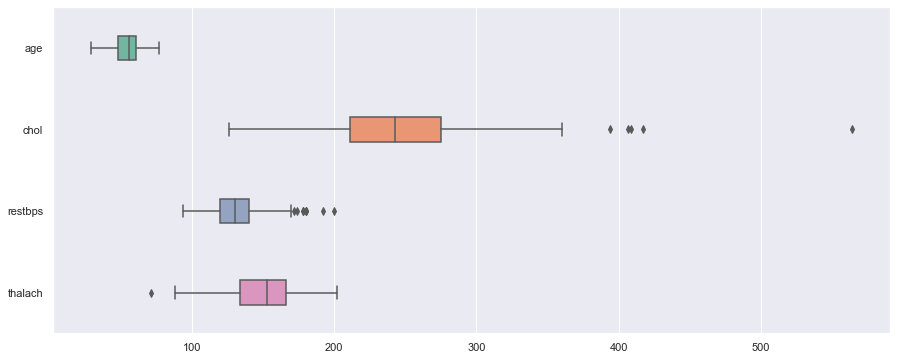

In [28]:
# Printing boxplot for attributes age, chol, restbps, and thalach
ax = sns.boxplot(data=df[['age','chol','restbps','thalach']], orient="h", palette="Set2",width=0.3)

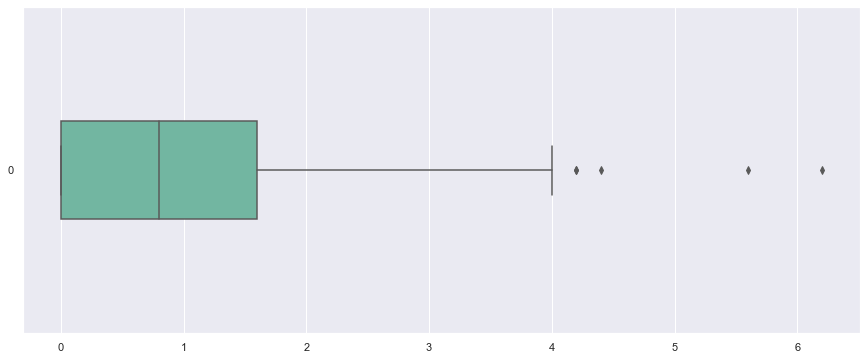

In [29]:
# As the attribute oldpeak has a small values range, it will be better visualized if 
# printed apartfrom the remaining continuous attributes
ax = sns.boxplot(data=df['oldpeak'], orient="h", palette="Set2",width=0.3)

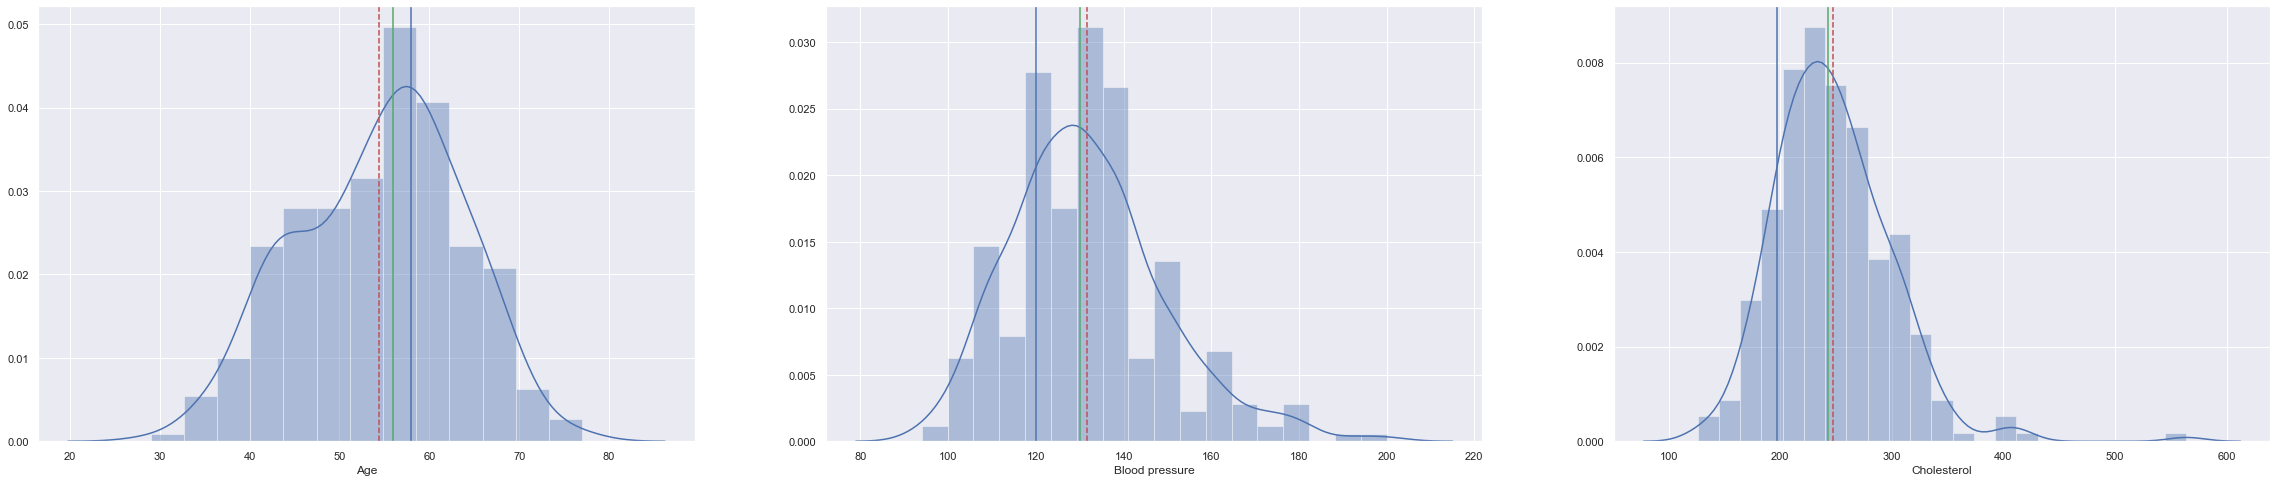

In [30]:
# Printing measure of central tendency for features age, restbps, and cholesterol
f, (ax_box, ax_box2, ax_box3) = plt.subplots(1, 3,figsize=(40,8))

# --------------age ------------------
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode().tolist()[0]

sns.distplot(df["age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

ax_box.set(xlabel='Age')

# ----------- blood pressure -------------
mean2=df['restbps'].mean()
median2=df['restbps'].median()
mode2=df['restbps'].mode().tolist()[0]

sns.distplot(df["restbps"], ax=ax_box2)
ax_box2.axvline(mean2, color='r', linestyle='--')
ax_box2.axvline(median2, color='g', linestyle='-')
ax_box2.axvline(mode2, color='b', linestyle='-')

ax_box2.set(xlabel='Blood pressure')

# -----------------Cholesterol ---------------------
mean3=df['chol'].mean()
median3=df['chol'].median()
mode3=df['chol'].mode().tolist()[0]

sns.distplot(df["chol"], ax=ax_box3)
ax_box3.axvline(mean3, color='r', linestyle='--')
ax_box3.axvline(median3, color='g', linestyle='-')
ax_box3.axvline(mode3, color='b', linestyle='-')
ax_box3.set(xlabel='Cholesterol')

plt.show()

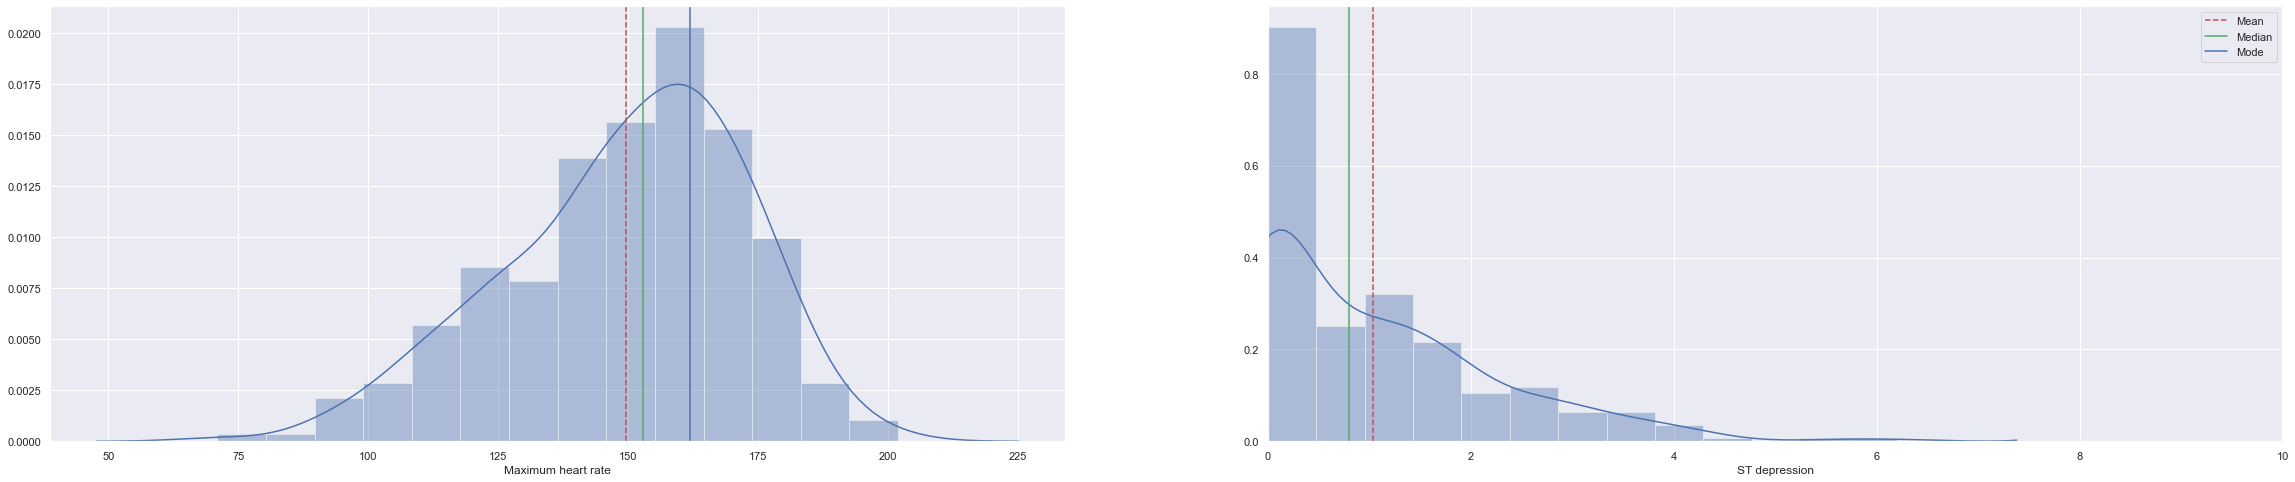

In [31]:
# Printing measure of central tendency for features thalach, and oldpeak

f, (ax_box4,ax_box5) = plt.subplots(1, 2,figsize=(40,8))


# ---------------------------------

mean4=df['thalach'].mean()
median4=df['thalach'].median()
mode4=df['thalach'].mode().tolist()[0]

sns.distplot(df["thalach"], ax=ax_box4)
ax_box4.axvline(mean4, color='r', linestyle='--')
ax_box4.axvline(median4, color='g', linestyle='-')
ax_box4.axvline(mode4, color='b', linestyle='-')

ax_box4.set(xlabel='Maximum heart rate')

# --------------ST depression ----------------
mean5=df['oldpeak'].mean()
median5=df['oldpeak'].median()
mode5=df['oldpeak'].mode().tolist()[0]

sns.distplot(df["oldpeak"], ax=ax_box5)
ax_box5.set_xlim(0,10)
ax_box5.axvline(mean5, color='r', linestyle='--')
ax_box5.axvline(median5, color='g', linestyle='-')
ax_box5.axvline(mode5, color='b', linestyle='-')

ax_box5.set(xlabel='ST depression')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

plt.show()

### Printing histograms of categorical attributtes

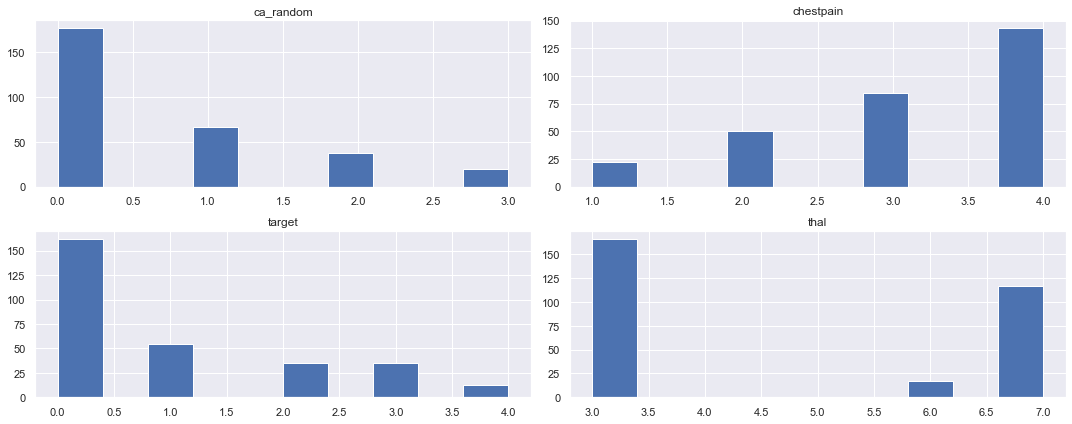

In [32]:
# Printing histograms of the following attributes: 'ca_random','chestpain','target','thal'
df.hist(column = ['ca_random','chestpain','target','thal'])
plt.tight_layout()
plt.show()

In [33]:
# Correlation table
ht=df.corr()
ht.round(2)

,thalach,oldpeak,ca_random,chol,age,restbps,chestpain,thal,target
thalach,1.00,-0.35,-0.27,-0.01,-0.40,-0.05,-0.34,-0.28,-0.42
oldpeak,-0.35,1.00,0.30,0.05,0.20,0.19,0.21,0.34,0.51
ca_random,-0.27,0.30,1.00,0.12,0.36,0.10,0.24,0.26,0.52
chol,-0.01,0.05,0.12,1.00,0.21,0.13,0.07,0.01,0.07
age,-0.40,0.20,0.36,0.21,1.00,0.28,0.11,0.13,0.23
restbps,-0.05,0.19,0.10,0.13,0.28,1.00,-0.03,0.13,0.16
chestpain,-0.34,0.21,0.24,0.07,0.11,-0.03,1.00,0.27,0.40
thal,-0.28,0.34,0.26,0.01,0.13,0.13,0.27,1.00,0.51
target,-0.42,0.51,0.52,0.07,0.23,0.16,0.40,0.51,1.00


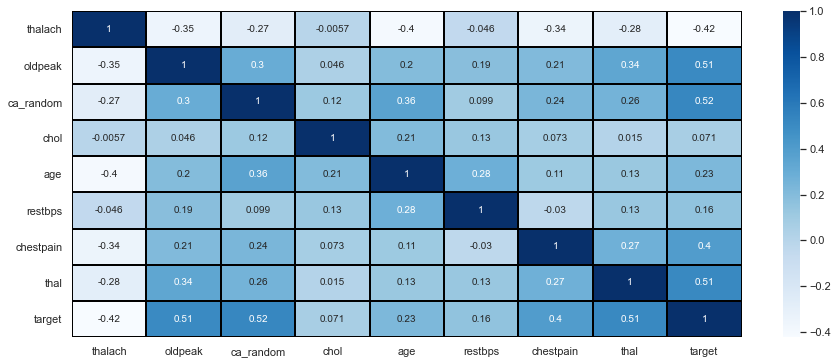

In [34]:
# There are no strong correlation between the atttributes
# Printing correlation matrix using heatmap for visualization purposes.
sns.heatmap(ht, cmap="Blues", linecolor="black", linewidths=1, annot= True)

### Part 3: Supervised Learning

In [35]:
# printing the dataset
df.head()

,thalach,oldpeak,ca_random,chol,age,restbps,chestpain,thal,target
0,108,1.5,3.0,286,67,160,4,3.0,2
1,129,2.6,2.0,229,67,120,4,7.0,1
2,187,3.5,0.0,250,37,130,3,3.0,0
3,172,1.4,0.0,204,41,130,2,3.0,0
4,178,0.8,0.0,236,56,120,2,3.0,0


In [36]:
# Unique values in target column
df.target.unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [37]:
# Currently the dataset has target values in range [0, 4], indicating severity of heart disease,
# with 0 meaning no heart disease and rest indicating heart disease.

# So we will replace values 1-4 in target column with 1, and the updated column will have only
# two values. 0 meaning no heart disease and 1 indicating heart disease.
df['target'].replace({1:1, 2:1,3:1,4:1}, inplace=True)
df.target.unique()

array([1, 0], dtype=int64)

In [38]:
# defining features
features = ['thalach','oldpeak','ca_random','thal','chol','age','restbps','chestpain']

In [39]:
# setting target variable
y = df[['target']].copy()
y.head()

,target
0,1
1,1
2,0
3,0
4,0


In [40]:
# setting input variable
X  = df[features].copy()
X.head()

,thalach,oldpeak,ca_random,thal,chol,age,restbps,chestpain
0,108,1.5,3.0,3.0,286,67,160,4
1,129,2.6,2.0,7.0,229,67,120,4
2,187,3.5,0.0,3.0,250,37,130,3
3,172,1.4,0.0,3.0,204,41,130,2
4,178,0.8,0.0,3.0,236,56,120,2


### Splitting The Dataset Into Training & Test Datasets 
The data will be divided into test and training datasets. The training dataset will be used to train the model, and the test dataset will be used to test the model’s performance.

While splitting the data into training and test datasets, two things come into the picture:
1. **Test Size**<br> 
This parameter defines the percentage of the data used to test the model’s performance. For example, if the test size is 0.25, then 25% of data will form test data, and the remaining 75% will create training data. The value of this parameter is between 0 and 1 and can be an int or float.<br><br>  
2. **Random State**<br>
This parameter controls the shuffling applied to the data before it is split. For example, consider that the data under consideration has 100 records. If the random state is set to 5, then the first ten records (1 -10) may form a part of the test dataset, but if the random state is 15, it can be the case that records from 11 to 20 become part of the test dataset.<br> This virtually affects the conclusions about the model’s performance, as the test datasets for different random states may or may not be alike (well balanced, not biased), and accuracy results will vary. To overcome this problem, a random state is always specified so that any random state is not picked up during the time of execution.

In [41]:
# random split
# test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.head()

,thalach,oldpeak,ca_random,thal,chol,age,restbps,chestpain
296,123,0.2,0.0,7.0,241,57,140,4
158,151,1.0,1.0,7.0,277,68,118,3
144,152,0.0,0.0,3.0,243,47,108,3
34,178,0.0,0.0,3.0,226,42,140,4
164,168,0.0,0.0,7.0,207,57,132,4


In [42]:
# random split
# test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.head()

,thalach,oldpeak,ca_random,thal,chol,age,restbps,chestpain
291,144,2.8,0.0,6.0,169,44,120,4
204,147,0.0,3.0,7.0,309,45,142,4
55,163,0.6,1.0,7.0,233,50,140,3
169,112,2.9,1.0,7.0,269,70,160,3
240,163,0.0,0.0,3.0,306,41,126,2


As can be seen from above two executions, the training datasets are different.

In [43]:
# specifying random_state 324
# test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 324)
X_train.head()

,thalach,oldpeak,ca_random,thal,chol,age,restbps,chestpain
268,150,0.0,0.0,3.0,180,42,130,3
147,170,0.0,0.0,3.0,308,45,128,2
197,162,1.1,0.0,3.0,244,50,120,2
259,149,0.3,1.0,3.0,242,44,118,3
266,134,2.2,1.0,6.0,218,59,126,3


In [44]:
# specifying random_state 324
# test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 324)
X_train.head()

,thalach,oldpeak,ca_random,thal,chol,age,restbps,chestpain
268,150,0.0,0.0,3.0,180,42,130,3
147,170,0.0,0.0,3.0,308,45,128,2
197,162,1.1,0.0,3.0,244,50,120,2
259,149,0.3,1.0,3.0,242,44,118,3
266,134,2.2,1.0,6.0,218,59,126,3


As expected, after specifying the random state, the datasets remain the same irrespective of the executions.

### Training The Model
The datasets that we created above will be used to train the model. This will be done using Decision Tree Classifier with max leaf nodes as 10, and Naive Bayes.

**Decision Tree**

In [45]:
decisiontree_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
decisiontree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [46]:
# predicting the values
decisiontree_predictions = decisiontree_classifier.predict(X_test)

**Naive Bayes**

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
nb_predictions = gnb.fit(X, y).predict(X_test)

### Model Performance
To check for the performace of the model, we will use accuracy score to determine the percentage of predicted values that the model got correct.

In [48]:
# decision tree accuracy
accuracy_score(y_true = y_test, y_pred = decisiontree_predictions)

0.7878787878787878

The accuracy score for the **Decision Tree Model** is **80%**.

In [49]:
# naive bayes accuracy
accuracy_score(y_true = y_test, y_pred = nb_predictions)

0.8181818181818182

The accuracy score for the **Naive Bayes Model** is **84%**.

### Confusion Matrix

**Decision Tree**

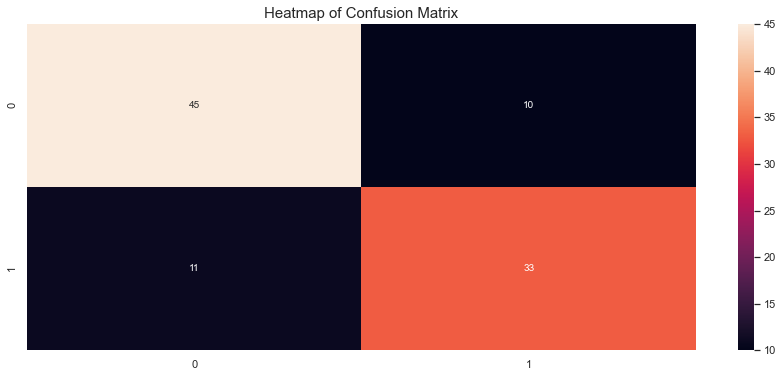

In [50]:
akws = {'backgroundcolor':'blue','verticalalignment':'center', 'horizontalalignment':'center', 'fontsize': 10}
cm = confusion_matrix(y_test, decisiontree_predictions)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot=True)
plt.show()

**Analysis**
From above confusion matrix it can be seen that TP=38, FP=8, FN=12, and TN=42.
Following metrics are calculated based on above data:
1. **Recall:** Of all the positve classes, how many were predicted correctly.<br> TP/(TP + FN) = 38/(38 + 12) = 0.76 i.e. **76%**
2. **Precision:** Of all the values predicted positive, how many are actually positive.<br>TP/(TP + FP) = 38/(38 + 8) = 0.826 i.e. **82.6%** 
3. **Accuracy:** Of all the cases, how may were predicted correctly.<br> (TP + TN)/Total = 80/100 = 0.8 i.e. **80%**
4. **F Measure:** Used to compare two models.
<br> Formula for F measure is (2 * recall * precision) / (recall + precision) = (2 * 0.76 * 0.826) / (0.76 + 0.826) = **0.791**

**Naive Bayes**

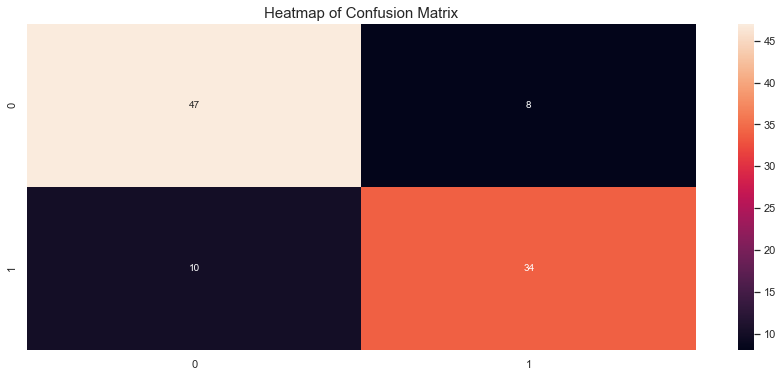

In [52]:
akws = {'backgroundcolor':'blue','verticalalignment':'center', 'horizontalalignment':'center', 'fontsize': 10}
cm = confusion_matrix(y_test, nb_predictions)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot=True)
plt.show()

**Analysis**
From above confusion matrix it can be seen that TP=39, FP=5, FN=11, and TN=45.
Following metrics are calculated based on above data:
1. **Recall:** Of all the positve classes, how many were predicted correctly.<br> TP/(TP + FN) = 39/(39 + 11) = 0.78 i.e. **78%**
2. **Precision:** Of all the values predicted positive, how many are actually positive.<br>TP/(TP + FP) = 39/(39 + 5) = 0.886 i.e. **88.6%** 
3. **Accuracy:** Of all the cases, how may were predicted correctly.<br> (TP + TN)/Total = 84/100 = 0.8 i.e. **84%**
4. **F Measure:** Used to compare two models.
<br> Formula for F measure is (2 * recall * precision) / (recall + precision) = (2 * 0.78 * 0.886) / (0.78 + 0.886) = **0.829**

**Conclusion**
Since Naive Bayes model has higher F1 score compared to Decision Tree model, therefore, for this dataset Naive Bayes model is better suited. 

### Part 4: Unsupervised Learning

In Unsupervised learning, there are no labels available; therefore, we cannot measure the task, and the performance of the AI agent cannot be measured clearly and easily.

Unsupervised learning can find several groups, accordingly, it is better than supervised learning at finding new patterns in data and labeling unlabeled examples automatically.

We are clustering all the examples in the dataset and then apply the labels within the same cluster.

In [127]:
# Import dependencis required to implement the unsupervised model.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Preview the data.
It will show the first five rows of the dataset.

In [143]:
# Print out the dataset
df.head()

,thalach,oldpeak,ca_random,chol,age,restbps,chestpain,thal,target
0,108,1.5,3.0,286,67,160,4,3.0,1
1,129,2.6,2.0,229,67,120,4,7.0,1
2,187,3.5,0.0,250,37,130,3,3.0,0
3,172,1.4,0.0,204,41,130,2,3.0,0
4,178,0.8,0.0,236,56,120,2,3.0,0


### Data exploration
It will generate summary statistics for the data and identify non numeric values by feature.

In [129]:
df.describe()

,thalach,oldpeak,ca_random,chol,age,restbps,chestpain,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,149.700000,1.039000,0.673333,246.983333,54.423333,131.670000,3.163333,4.730000,0.46000
std,22.899008,1.163051,0.936061,51.940245,9.068900,17.668475,0.955527,1.941563,0.49923
min,71.000000,0.000000,0.000000,126.000000,29.000000,94.000000,1.000000,3.000000,0.00000
25%,133.750000,0.000000,0.000000,211.000000,47.750000,120.000000,3.000000,3.000000,0.00000
50%,153.000000,0.800000,0.000000,242.500000,56.000000,130.000000,3.000000,3.000000,0.00000
75%,166.000000,1.600000,1.000000,275.250000,61.000000,140.000000,4.000000,7.000000,1.00000
max,202.000000,6.200000,3.000000,564.000000,77.000000,200.000000,4.000000,7.000000,1.00000


In [130]:
nan_counter = np.isnan(df).sum()
nan_counter

thalach      0
oldpeak      0
ca_random    0
chol         0
age          0
restbps      0
chestpain    0
thal         0
target       0
dtype: int64

In [131]:
distinctCounter = df.apply(lambda x: len(x.unique()))
distinctCounter

thalach       91
oldpeak       40
ca_random      4
chol         152
age           41
restbps       50
chestpain      4
thal           3
target         2
dtype: int64

- Select the features from the dataset.
- Feature extraction to reduce the number of original features to a smaller subset..

In [132]:
features = ['thalach','oldpeak','ca_random','thal','chol','age','restbps','chestpain']

In [133]:
# Create features matrix
x = df.loc[:, features].values
x[:10]

array([[108. ,   1.5,   3. ,   3. , 286. ,  67. , 160. ,   4. ],
       [129. ,   2.6,   2. ,   7. , 229. ,  67. , 120. ,   4. ],
       [187. ,   3.5,   0. ,   3. , 250. ,  37. , 130. ,   3. ],
       [172. ,   1.4,   0. ,   3. , 204. ,  41. , 130. ,   2. ],
       [178. ,   0.8,   0. ,   3. , 236. ,  56. , 120. ,   2. ],
       [160. ,   3.6,   2. ,   3. , 268. ,  62. , 140. ,   4. ],
       [163. ,   0.6,   0. ,   3. , 354. ,  57. , 120. ,   4. ],
       [147. ,   1.4,   1. ,   7. , 254. ,  63. , 130. ,   4. ],
       [155. ,   3.1,   0. ,   7. , 203. ,  53. , 140. ,   4. ],
       [148. ,   0.4,   0. ,   6. , 192. ,  57. , 140. ,   4. ]])

- Select the target column to check the model's result.
- We know the appropriate groups; therefore, we can use this target column to check the clusters.

In [134]:
y = df['target']
y.value_counts()

0    162
1    138
Name: target, dtype: int64

### Apply standard scaler.

It controls the dataset variability and converts data into a specific range using a linear transformation, which generates enough quality clusters and improves clustering algorithms' accuracy.

In [135]:
x = StandardScaler().fit_transform(x)
x[:10]

array([[-1.82408229,  0.39703349,  2.4897469 , -0.89252364,  0.75243884,
         1.38910794,  1.60609983,  0.87707033],
       [-0.9054797 ,  1.34440192,  1.41965511,  1.17111483, -0.3468097 ,
         1.38910794, -0.66160201,  0.87707033],
       [ 1.63161318,  2.11952154, -0.72052847, -0.89252364,  0.0581766 ,
        -1.92442809, -0.09467655, -0.1712209 ],
       [ 0.97546847,  0.31090909, -0.72052847, -0.89252364, -0.82893625,
        -1.48262329, -0.09467655, -1.21951214],
       [ 1.23792635, -0.20583732, -0.72052847, -0.89252364, -0.21181427,
         0.17414473, -0.66160201, -1.21951214],
       [ 0.4505527 ,  2.20564594,  1.41965511, -0.89252364,  0.40530772,
         0.83685193,  0.47224891,  0.87707033],
       [ 0.58178164, -0.37808613, -0.72052847, -0.89252364,  2.06382306,
         0.28459593, -0.66160201,  0.87707033],
       [-0.11810605,  0.31090909,  0.34956332,  1.17111483,  0.13531685,
         0.94730313, -0.09467655,  0.87707033],
       [ 0.2318378 ,  1.77502393

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'thalach')

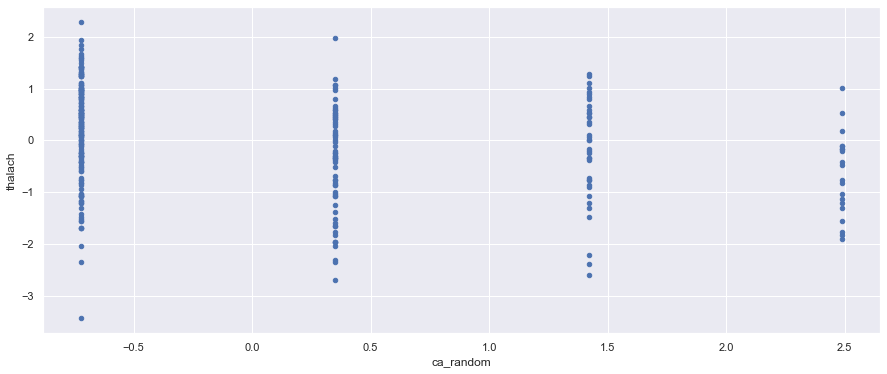

In [136]:
pd.DataFrame(x, columns = features).plot.scatter('ca_random', 'thalach')
plt.xlabel('ca_random')
plt.ylabel('thalach')

### Define and execute K-means algorithm
We are executing the k-means algorithm with two clusters and random state with the value 1 which determines random number generation for centroid initialization.

In [137]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=1)

In [138]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Show the clusters

We are creating a plot to show the cluster and the distribution of the data within these.

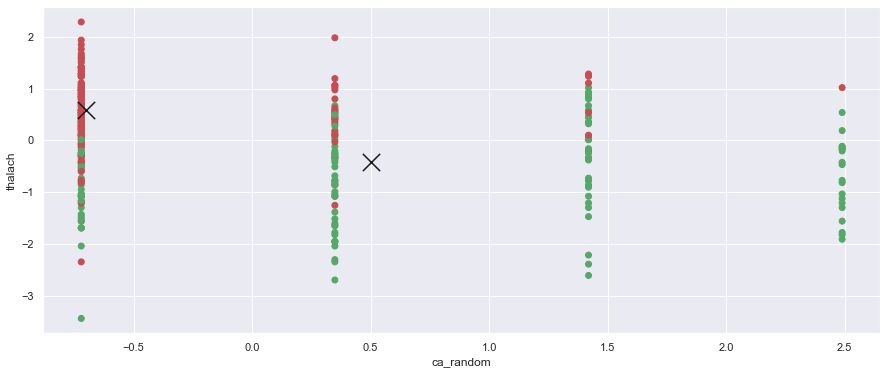

In [139]:
x_label = 'ca_random'
y_label = 'thalach'

x = pd.DataFrame(x, columns = features)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x[x_label], x[y_label], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel(x_label)
plt.ylabel(y_label);

### Compare the result with the target column


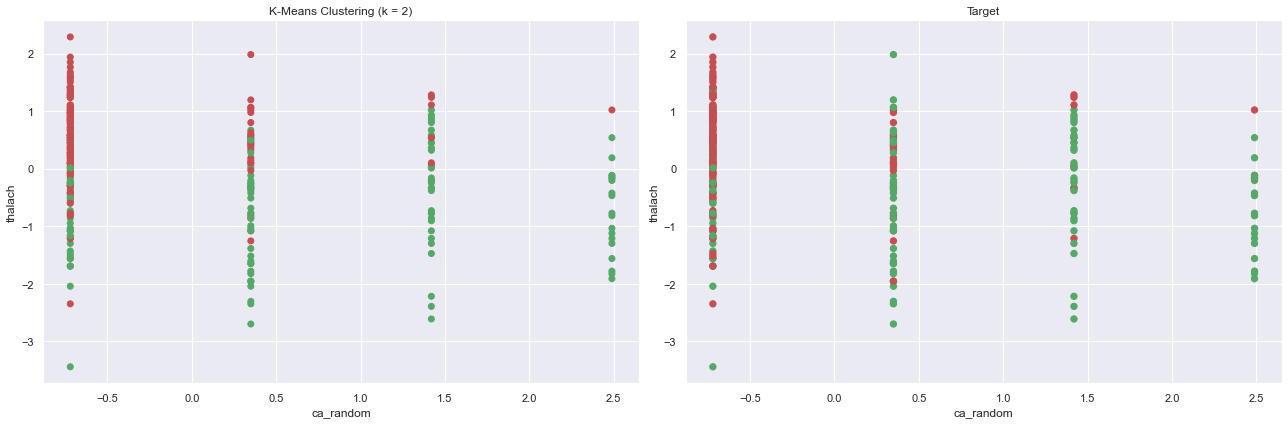

In [140]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.scatter(x[x_label], x[y_label], c=colormap[labels])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('K-Means Clustering (k = 2)')

plt.subplot(1, 2, 2)
plt.scatter(x[x_label], x[y_label], c=colormap[y], s=40)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Target')

plt.tight_layout()

### Conclusion
#### Elbow Method as evaluation method

The Elbow method based on the sum of squared distance between data points and assigned clusters will help us a good number of clusters.

This one aims to evaluate the sum of squared distance for different clusters' values and see where the curve might form an elbow and flatten out.

Executing with the cluster: 1
Executing with the cluster: 2
Executing with the cluster: 3
Executing with the cluster: 4
Executing with the cluster: 5
Executing with the cluster: 6
Executing with the cluster: 7
Executing with the cluster: 8
Executing with the cluster: 9


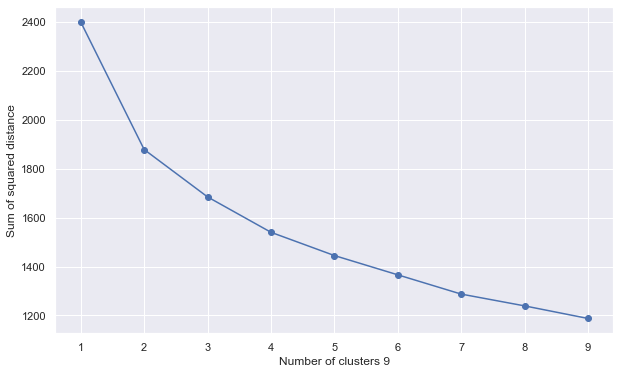

In [144]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    print(f'Executing with the cluster: {k}')
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(f'Number of clusters {k}')
plt.ylabel('Sum of squared distance');

The chart above tells that two clusters are not the wrong choice. Sometimes, It is still tricky to figure out a suitable number of clusters because the curve is monotonically decreasing and may not show an obvious point where the curve starts flattening out.